<a href="https://colab.research.google.com/github/SMSinclair/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Stephen_Sinclair_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
# TODO - we'll be doing this live, taking requests
# and reproducing what it is to look up and learn things



## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
# TODO - your code here
# Use what we did live in lecture as an example

In [0]:
# Importing sunspot data into a pandas dataframe
# I thought this would be an manageable entry point for learning more about time 
# series analysis
import statsmodels.api as sm
import pandas as pd
data_loader = sm.datasets.sunspots.load_pandas()
df = data_loader.data

In [0]:
# Having a look at the data
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [0]:
df.tail()

,YEAR,SUNACTIVITY
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


In [0]:
print(df['SUNACTIVITY'].describe())

count    309.000000
mean      49.752104
std       40.452595
min        0.000000
25%       16.000000
50%       40.000000
75%       69.800000
max      190.200000
Name: SUNACTIVITY, dtype: float64


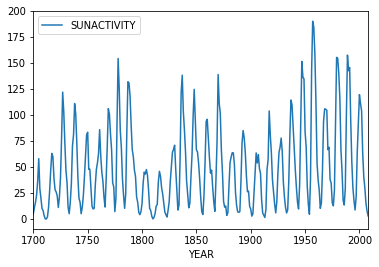

In [0]:
df.plot(x='YEAR', y='SUNACTIVITY', xlim=(1700,2008))

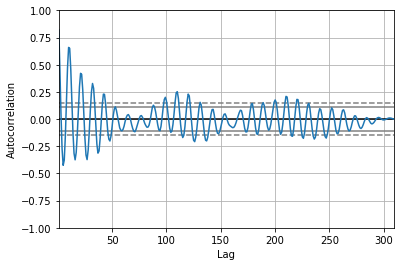

In [0]:
# The notebook I was referencing had pd.tools.plotting...
# Which didn't work, so I found example documentation and fixed it.

# Here is a plot of the autocorrelations versus time lag. The horizontal lines 
# are the 95% (solid) and 99% (dotted) confidence bands

# The blue line goes beyond the confidence bands, indicating that this is a 
# "non-stationary time-series with correlation structure." 
# non-stationary: statistical properties such as mean, variance, and 
# auto-correlation change over time

pd.plotting.autocorrelation_plot(df['SUNACTIVITY'])

In [0]:
# Create an array of frequencies to evaluate the series over

# The original code was throwing an error saying a float can't safely be 
# interpreted as an integer. Wasn't sure exactly what was going on but
# switching to an int division operator seemed to fix the problem.
import numpy as np
N2 = df.shape[0] // 2
freqs = np.linspace(0, 0.5, num=N2, endpoint=False)[1:]

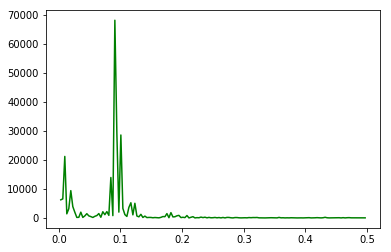

In [0]:
# Use the frequencies to plot the periodogram (frequency domain analog of the 
# autocorrelation plot above)
# Using the Lomb-Scargle method
import scipy as sp
periodogram = sp.signal.lombscargle(df['YEAR'], df['SUNACTIVITY'], freqs * 2 * np.pi)
plt.plot(freqs, periodogram, color='green')

In [0]:
# Since these are yearly observations, we can divide 1 by the frequency to get 
# the period of each cycle
freq_index_at_max_power = np.argmax(periodogram)
print('Frequency and corresponding time in years at max power: %.2f, %.1f' 
% (freqs[freq_index_at_max_power], 1 / freqs[freq_index_at_max_power]))

Frequency and corresponding time in years at max power: 0.09, 11.0


In [0]:
# This result lines up with the literature, which states that the "rise and 
# fall in sunspot counts varies in a cyclical way; the length of the cycle is 
# around 11 years on average" (https://scied.ucar.edu/sunspot-cycle)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

I created plots of the number of sunspots observed on the surface of the sun from 1700-2008. I did this to learn about patterns and cycles that emerge over time. A basic plot showed that the counts clearly vary in a cyclical way. Using a plot called a periodogram, however, I was able to determine that the average cycle lasts 11 years.

2.  What was the most challenging part of what you did?

The most challening part of what I did was trying to quickly get enough of a basic grasp of the plots I was using so that I could understand what I was doing.


3.  What was the most interesting thing you learned?

The most interesting thing I learned was that you can quickly and easily plot the autocorrelations of a time-series with pandas.

4.  What area would you like to explore with more time?

I'd like to get a better grasp on exactly what a periodogram is.


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.